# Indicators of Heavy Traffic on I-94

## Interstate 94

Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. It lies along the primary overland route from Seattle (via I-90) to Toronto (via Ontario Highway 401) and is the only east–west Interstate Highway to have a direct connection to Canada.

![](https://www.google.com/maps/vt/data=qJv5dZdTi1ISm8OHaHxiTKwdNOv1SKJH7eqvZplQdBqwyH0_Yvz-a9q26al0GM0KHlabbKztkmIpSdUfj2ru4iGF9xvvItdG25lXscVsh0aGY5ivWBwYv3iaPLGdxWVO6aMhpjZKkVgK5td3ky1Vf3QlF0P4bZp78YxsB7BxUWsbT_SRIAQtT-jo6UOLyTBRmZDnYX_rlgX5tJ-U2cOVntutv45aa0IaGTyNSkGY-CDqZzcdCjg0hS-ogZ17q4dRo9-ctIe8lf0P84y7)

## Project and Data Overview

In this project, I'm going to analyze a dataset about the westbound traffic on the I-94 Interstate highway, then determine a few indicators of heavy traffic. John Hogue made the dataset available, and you can download the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#).

The goal of my analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). Hence the results of my analysis will be limited to the westbound traffic in the proximity of that station. 

Here is a description of the columns in the dataset:

- `holiday`:- US National holidays plus regional holidays 
- `temp`:- Average temperature in kelvin 
- `rain_1h`:- Amount in millimetres of rain that occurred in the hour 
- `snow_1h`:- Amount in millimetres of snow that occurred in the hour 
- `clouds_all`:- Percentage of cloud cover 
- `weather_main`:- Short textual description of the current weather 
- `weather_description`:- Longer textual description of the current weather 
- `date_time`:- Time of data collection in local CST time 
- `traffic_volume`:- Hourly I-94 ATR 301 reported westbound traffic volume

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate

## Exploring the Dataset

In [3]:
df = pd.read_csv("data/Metro_Interstate_Traffic_Volume.csv")

In [34]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [35]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Initial Notes

- *The traffic dataset contains **48,204 rows** and **9 columns**. No columns have null values.*
- *We have traffic information from 2012-10-02 at 9am to 2018-09-30 at 11pm.*
- *The `date_time` column is stored as a string/object type rather than the DateTime type.*

## Analyzing Traffic Volume

To get a general overview of westbound traffic between Minneapolis and St Paul, we can start by examining the distribution of the `traffic_volume` column.

+-------------+----------+
| statistic   |   values |
|-------------+----------|
| count       |    48204 |
| mean        |  3259.82 |
| std         |  1986.86 |
| min         |        0 |
| 25%         |     1193 |
| 50%         |     3380 |
| 75%         |     4933 |
| max         |     7280 |
+-------------+----------+


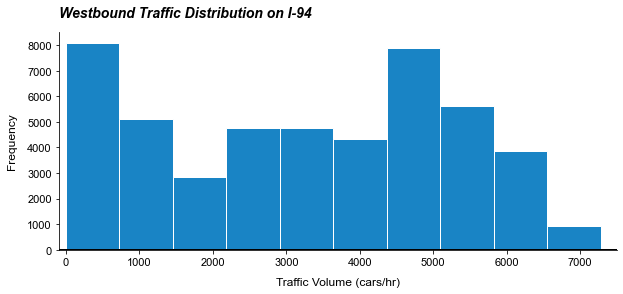

In [4]:
#Print descriptive statistics
table = (df['traffic_volume'].describe()).to_frame()
print(tabulate(table, headers= ['statistic', 'values'], tablefmt='psql', numalign="right"))

## Generate an histogram graph
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
with sns.axes_style("darkgrid"):
    plt.hist(df["traffic_volume"],color="#1984c5")
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
    plt.ylabel('Frequency', labelpad=10, fontsize='12')
    plt.title('Westbound Traffic Distribution on I-94', loc='left', fontstyle='italic', pad=15, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.xlim(-100,7500)
    plt.ylim(0,8500)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tick_params(direction='out')
    sns.despine()
    plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 
    plt.show()

### Observations

- Between 2012-10-02 and 2018-09-30, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars. The mean and median values of the traffic distribution are also very close (mean: 3259, median: 3380)
- 25% of the time, there were only 1,193 cars or fewer passing the station each hour. For the most part (75% of the time), there are lesser than 4,933 cars passing through the station every hour. Occassionally (about 25% of the time), heavy traffic may occur, with the station recording over 4,933 cars/hr.

## Traffic Volume: Day vs. Night

* `Daytime data`: hours from 7 a.m. to 7 p.m. (12 hours)
* `Nighttime data`: hours from 7 p.m. to 7 a.m. (12 hours)

In [5]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [6]:
day = df.copy()[(df["date_time"].dt.hour >= 7) & (df["date_time"].dt.hour < 19)]
night = df.copy()[(df["date_time"].dt.hour >= 19) | (df["date_time"].dt.hour < 7)]

print('Our daytime data has: {:,} rows and {} columns'.format(day.shape[0], day.shape[1]))
print('Our daytime data has: {:,} rows and {} columns'.format(night.shape[0], night.shape[1]))

Our daytime data has: 23,877 rows and 9 columns
Our daytime data has: 24,327 rows and 9 columns


+-------+-----------+-------------+
|       |   daytime |   nighttime |
|-------+-----------+-------------|
| count |     23877 |       24327 |
| mean  |   4762.05 |     1785.38 |
| std   |   1174.55 |     1441.95 |
| min   |         0 |           0 |
| 25%   |      4252 |         530 |
| 50%   |      4820 |        1287 |
| 75%   |      5559 |        2819 |
| max   |      7280 |        6386 |
+-------+-----------+-------------+


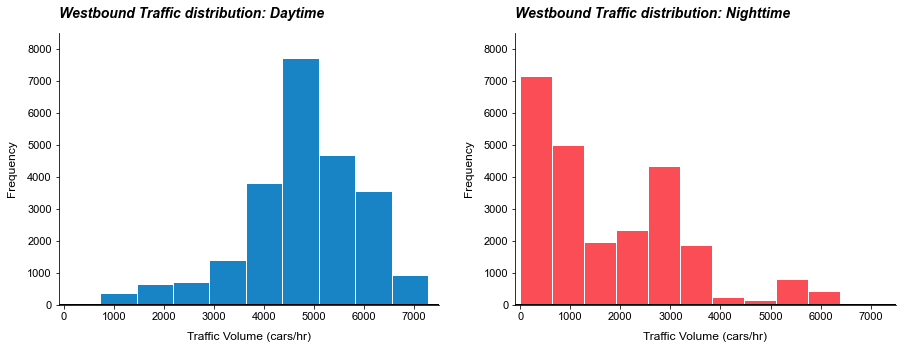

In [7]:
#Print descriptive statistics for day and night
day_desc = day[['traffic_volume']].describe()
night_desc = night[['traffic_volume']].describe()
merge_desc = pd.concat([day_desc,night_desc],axis=1)

print(tabulate(merge_desc, headers= ['','daytime','nighttime'], tablefmt='psql', numalign="right"))


# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
with sns.axes_style("darkgrid"):
    plt.hist(day["traffic_volume"],color="#1984c5")
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
    plt.ylabel('Frequency', labelpad=10, fontsize='12')
    plt.title('Westbound Traffic distribution: Daytime', loc='left', fontstyle='italic', pad=15, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.xlim(-100,7500)
    plt.ylim(0,8500)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tick_params(direction='out')
    sns.despine()
    plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 

plt.subplot(1,2,2)
with sns.axes_style("darkgrid"):
    plt.hist(night["traffic_volume"],color='#fa4d56')
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
    plt.ylabel('Frequency', labelpad=10, fontsize='12')
    plt.title('Westbound Traffic distribution: Nighttime', loc='left', fontstyle='italic', pad=15, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.xlim(-100,7500)
    plt.ylim(0,8500)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tick_params(direction='out')
    sns.despine()
    plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 
    plt.show()

### Observations

**Daytime Traffic:**

The distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high and lies in the range of 4,000 to 6,500 cars/hr.

**Nighttime Traffic:**

The nighttime data is right skewed, indicating an opposite pattern to daytime trends. At night, higher traffic volumes are less common.



## Time Indicators

I'm going to look at a few line plots showing how the traffic volume changes according to the following:

* Month
* Day of the week
* Time of day

### Daytime Traffic by Month

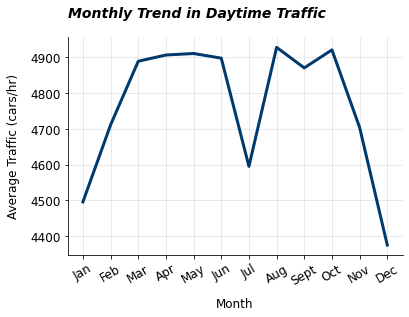

In [8]:
day["month"] = day["date_time"].dt.month
month_traffic = (day.groupby("month")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )

plt.plot(month_traffic["month"], month_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Monthly Trend in Daytime Traffic', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(1,13), rotation=30,
                   labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                           'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.show()



### Observations
- Traffic volumes vary between 4,000 and 5,000 cars per hour every month. August and October are noticeably the months with the highest traffic activity.
- Traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October).

### Week Day and Daytime Traffic

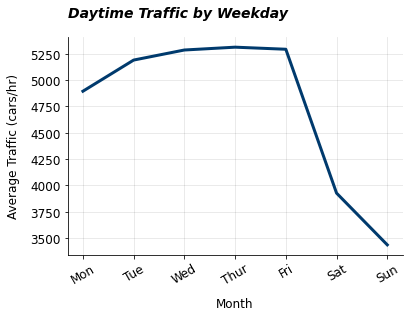

In [9]:
day["dayofweek"] = day["date_time"].dt.dayofweek

weekday_traffic = (day.groupby("dayofweek")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )

plt.plot(weekday_traffic["dayofweek"], weekday_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Daytime Traffic by Weekday', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(0,7), rotation=30, 
                   labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()

### Observation

Traffic volume is significantly heavier on working days (Monday – Friday) with average traffic volumes around 5,000 cars/hr. Traffic is lighter on weekends (less than 4,000 cars/hr).

### Daytime Traffic and Hour of Day

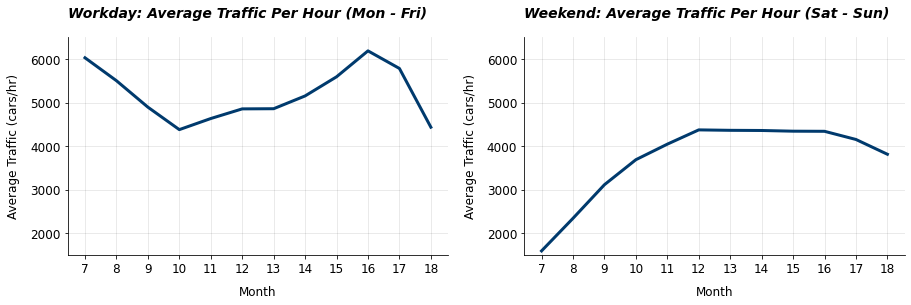

In [10]:
day["hour"] = day["date_time"].dt.hour
workday = day.copy()[day["dayofweek"] <= 4]
weekend = day.copy()[day["dayofweek"] >= 5]

workday_traffic = (workday.groupby("hour")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )

weekend_traffic = (weekend.groupby("hour")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )


plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.plot(workday_traffic["hour"], workday_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Workday: Average Traffic Per Hour (Mon - Fri)', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1500,6500])
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(7,19))

plt.subplot(1,2,2)
plt.plot(weekend_traffic["hour"], weekend_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Weekend: Average Traffic Per Hour (Sat - Sun)', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1500,6500])
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(7,19))

plt.show()


### Observations

- At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. The rush hours are around 7 and 16 — when most people travel from home to work and back. I see volumes of over 6,000 cars at rush hours.

- The weekend shows a notably different pattern. Traffic volumes are lower compared to the workdays. There is no increase in traffic activity at 7am.

To summarize, I found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

## Weather Indicators

Our dataset provides us with a few useful columns about weather. Some of these columns are numerical while the others are categorical:

- **Numerical columns**: `temp`, `rain_1h`, `snow_1h` and `clouds_all`.

- **Categorical columns**: `weather_main`  and `weather_description`.

### Numerical Weather Indicators

In [11]:
day[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`.

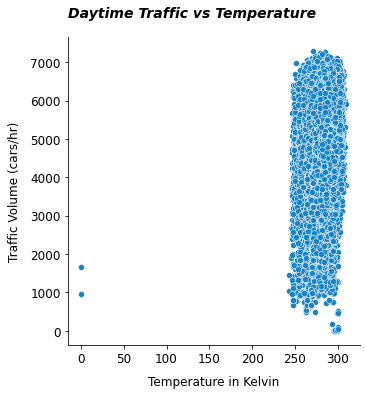

In [12]:
sns.relplot(data=day, x='temp', y="traffic_volume", color='#1984c5')
plt.title('Daytime Traffic vs Temperature', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.ylabel('Traffic Volume (cars/hr)',fontsize=12, labelpad=10)
plt.xlabel('Temperature in Kelvin', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlim([230,340])
plt.show()

I can conclude that temperature doesn't look like a solid indicator of heavy traffic. Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

### Categorical Weather Indicators

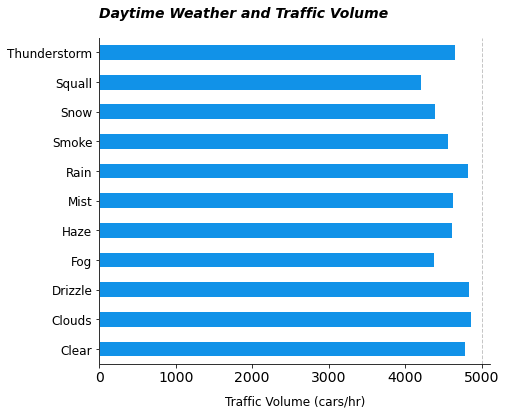

In [13]:
weather_type = (day.groupby('weather_main')["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )
bar_color = ['#1192e8' if (x < 5000) else '#fa4d56' for x in weather_type['avg_traffic']]
weather_type.plot.barh(y='avg_traffic', x='weather_main', legend=None, color=bar_color, figsize = (7,6))
plt.title('Daytime Weather and Traffic Volume', fontsize=14, fontweight='bold', pad=20, loc='left', fontstyle='italic')
plt.ylabel(None)
plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.axvline(x = 0, color = '#333', linestyle = '-', linewidth=2)
plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)
plt.show()

### Observation

On cloudy, drizzly, rainy and clear days, traffic approaches 5,000 cars/hr. However, there is still not enough evidence to conclude the relationship between weather types and heavy traffic.


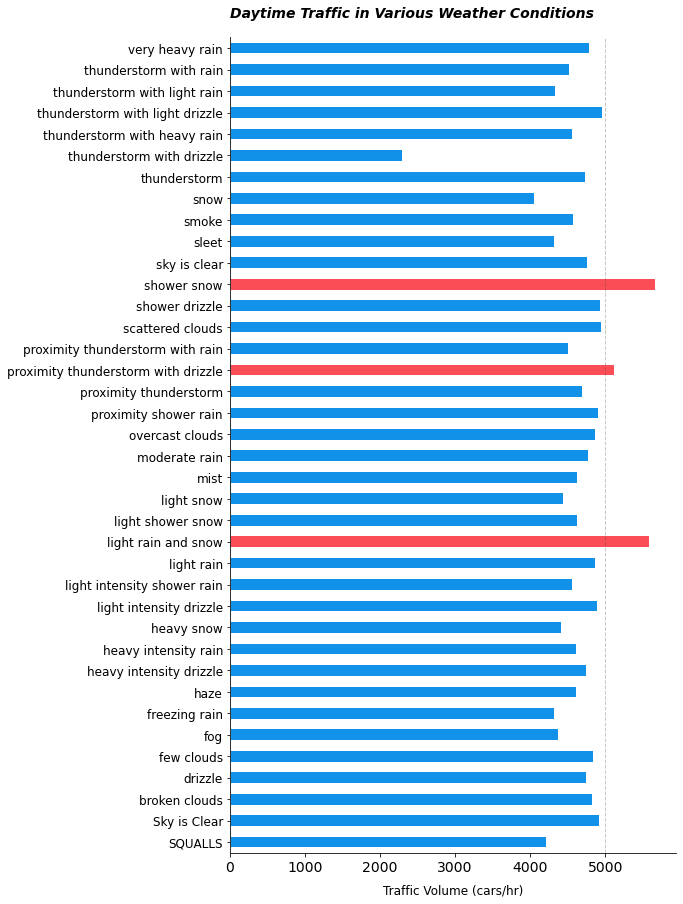

In [14]:
weather_desc = (day.groupby('weather_description')["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )
bar_color = ['#1192e8' if (x < 5000) else '#fa4d56' for x in weather_desc['avg_traffic']]
weather_desc.plot.barh(y='avg_traffic', x='weather_description', legend=None, color=bar_color, figsize = (8,15))
plt.title('Daytime Traffic in Various Weather Conditions', fontsize=14, fontweight='bold', pad=20, loc='left', fontstyle='italic')
plt.ylabel(None)
plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.axvline(x = 0, color = '#333', linestyle = '-', linewidth=2)
plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)
plt.show()

### Observation

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

These situations point to bad weather. In bad weather, people may prefer to commute through cars for safety reasons, rather than using alternatives like bikes or long walks.

### Conclusion

In this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I managed to find two types of indicators:

* Time indicators
    * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    * The traffic is usually heavier on business days compared to the weekends.
    * On business days, the rush hours are around 7 and 16.
* Weather indicators
    * Shower snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle